In [1]:
import mne
import numpy as np
from glob import glob
from sys import platform
import os
from blink_utils import *
import mat73

# Path to FIF files

In [2]:
SUBJECT = 2
FIF_PATH = os.path.join('..', '..', '2-mat-to-npy-fif', 'fif')
BLINK_SUMMARY_PATH = os.path.join(
    '..', 
    '..', 
    '3-find-blinks', 
    '3.1-eeglab-blinker', 
    'blinkerDumpDir', 
    f'dataSub{SUBJECT}_BlinkSummary.mat',
)

# output paths
MERGED_FIF_PATH = 'merged-fif'

In [3]:
DATA_FILES = glob(os.path.join(FIF_PATH, f'subject-{SUBJECT}_*.fif'))
DATA_FILES = sorted(DATA_FILES) # to sort by run#
DATA_FILES

['../../2-mat-to-npy-fif/fif/subject-2_trial-00_chor-096_condition-Listening_raw.fif',
 '../../2-mat-to-npy-fif/fif/subject-2_trial-01_chor-096_condition-Listening_raw.fif',
 '../../2-mat-to-npy-fif/fif/subject-2_trial-02_chor-038_condition-Listening_raw.fif',
 '../../2-mat-to-npy-fif/fif/subject-2_trial-03_chor-101_condition-Listening_raw.fif',
 '../../2-mat-to-npy-fif/fif/subject-2_trial-04_chor-101_condition-Listening_raw.fif',
 '../../2-mat-to-npy-fif/fif/subject-2_trial-05_chor-019_condition-Listening_raw.fif',
 '../../2-mat-to-npy-fif/fif/subject-2_trial-06_chor-019_condition-Listening_raw.fif',
 '../../2-mat-to-npy-fif/fif/subject-2_trial-07_chor-096_condition-Imagery_raw.fif',
 '../../2-mat-to-npy-fif/fif/subject-2_trial-08_chor-096_condition-Imagery_raw.fif',
 '../../2-mat-to-npy-fif/fif/subject-2_trial-09_chor-019_condition-Imagery_raw.fif',
 '../../2-mat-to-npy-fif/fif/subject-2_trial-10_chor-019_condition-Imagery_raw.fif',
 '../../2-mat-to-npy-fif/fif/subject-2_trial-11_cho

Combine all raws for one subject (that is one recording session)

In [5]:
RAWS_SUB = {}

for DATA_FILE in DATA_FILES: #[:2*5]:
    
    raw = mne.io.read_raw_fif(DATA_FILE, preload=True)
    fname = str(raw.filenames[0]).split(os.path.sep)[-1].rstrip('_raw.fif')
    
    toks = fname.split('_')
    subject = int(toks[0].split('-')[-1])
    condition = toks[2] + '/' + toks[3].lstrip('condition-')

    if not subject in RAWS_SUB:
        RAWS_SUB[subject] = []
    RAWS_SUB[subject].append(raw)
    
    #print(fname, subject, condition, run)
print(RAWS_SUB)

Opening raw data file ../../2-mat-to-npy-fif/fif/subject-2_trial-00_chor-096_condition-Listening_raw.fif...
    Range : 0 ... 1802 =      0.000 ...    28.156 secs
Ready.
Reading 0 ... 1802  =      0.000 ...    28.156 secs...
Opening raw data file ../../2-mat-to-npy-fif/fif/subject-2_trial-01_chor-096_condition-Listening_raw.fif...
    Range : 0 ... 1802 =      0.000 ...    28.156 secs
Ready.
Reading 0 ... 1802  =      0.000 ...    28.156 secs...
Opening raw data file ../../2-mat-to-npy-fif/fif/subject-2_trial-02_chor-038_condition-Listening_raw.fif...
    Range : 0 ... 1802 =      0.000 ...    28.156 secs
Ready.
Reading 0 ... 1802  =      0.000 ...    28.156 secs...
Opening raw data file ../../2-mat-to-npy-fif/fif/subject-2_trial-03_chor-101_condition-Listening_raw.fif...
    Range : 0 ... 1802 =      0.000 ...    28.156 secs
Ready.
Reading 0 ... 1802  =      0.000 ...    28.156 secs...
Opening raw data file ../../2-mat-to-npy-fif/fif/subject-2_trial-04_chor-101_condition-Listening_raw

In [6]:
RAWS_SUB[SUBJECT]

[<Raw | subject-2_trial-00_chor-096_condition-Listening_raw.fif, 68 x 1803 (28.2 s), ~1.0 MiB, data loaded>,
 <Raw | subject-2_trial-01_chor-096_condition-Listening_raw.fif, 68 x 1803 (28.2 s), ~1.0 MiB, data loaded>,
 <Raw | subject-2_trial-02_chor-038_condition-Listening_raw.fif, 68 x 1803 (28.2 s), ~1.0 MiB, data loaded>,
 <Raw | subject-2_trial-03_chor-101_condition-Listening_raw.fif, 68 x 1803 (28.2 s), ~1.0 MiB, data loaded>,
 <Raw | subject-2_trial-04_chor-101_condition-Listening_raw.fif, 68 x 1803 (28.2 s), ~1.0 MiB, data loaded>,
 <Raw | subject-2_trial-05_chor-019_condition-Listening_raw.fif, 68 x 1803 (28.2 s), ~1.0 MiB, data loaded>,
 <Raw | subject-2_trial-06_chor-019_condition-Listening_raw.fif, 68 x 1803 (28.2 s), ~1.0 MiB, data loaded>,
 <Raw | subject-2_trial-07_chor-096_condition-Imagery_raw.fif, 68 x 1803 (28.2 s), ~1.0 MiB, data loaded>,
 <Raw | subject-2_trial-08_chor-096_condition-Imagery_raw.fif, 68 x 1803 (28.2 s), ~1.0 MiB, data loaded>,
 <Raw | subject-2_trial

In [7]:
merged_raws = mne.concatenate_raws(RAWS_SUB[SUBJECT])

In [8]:
merged_raws

<Raw | subject-2_trial-00_chor-096_condition-Listening_raw.fif, 68 x 158664 (2479.1 s), ~82.4 MiB, data loaded>

In [11]:
order = []

for cond in ['Listening', 'Imagery']:
    for chor in ['chor-038', 'chor-096', 'chor-101', 'chor-019']:
        for filename in merged_raws.filenames:
            if (cond in str(filename)) and (chor in str(filename)):
                order.append(merged_raws.filenames.index(filename))

In [12]:
len(order)

88

Using matplotlib as 2D backend.


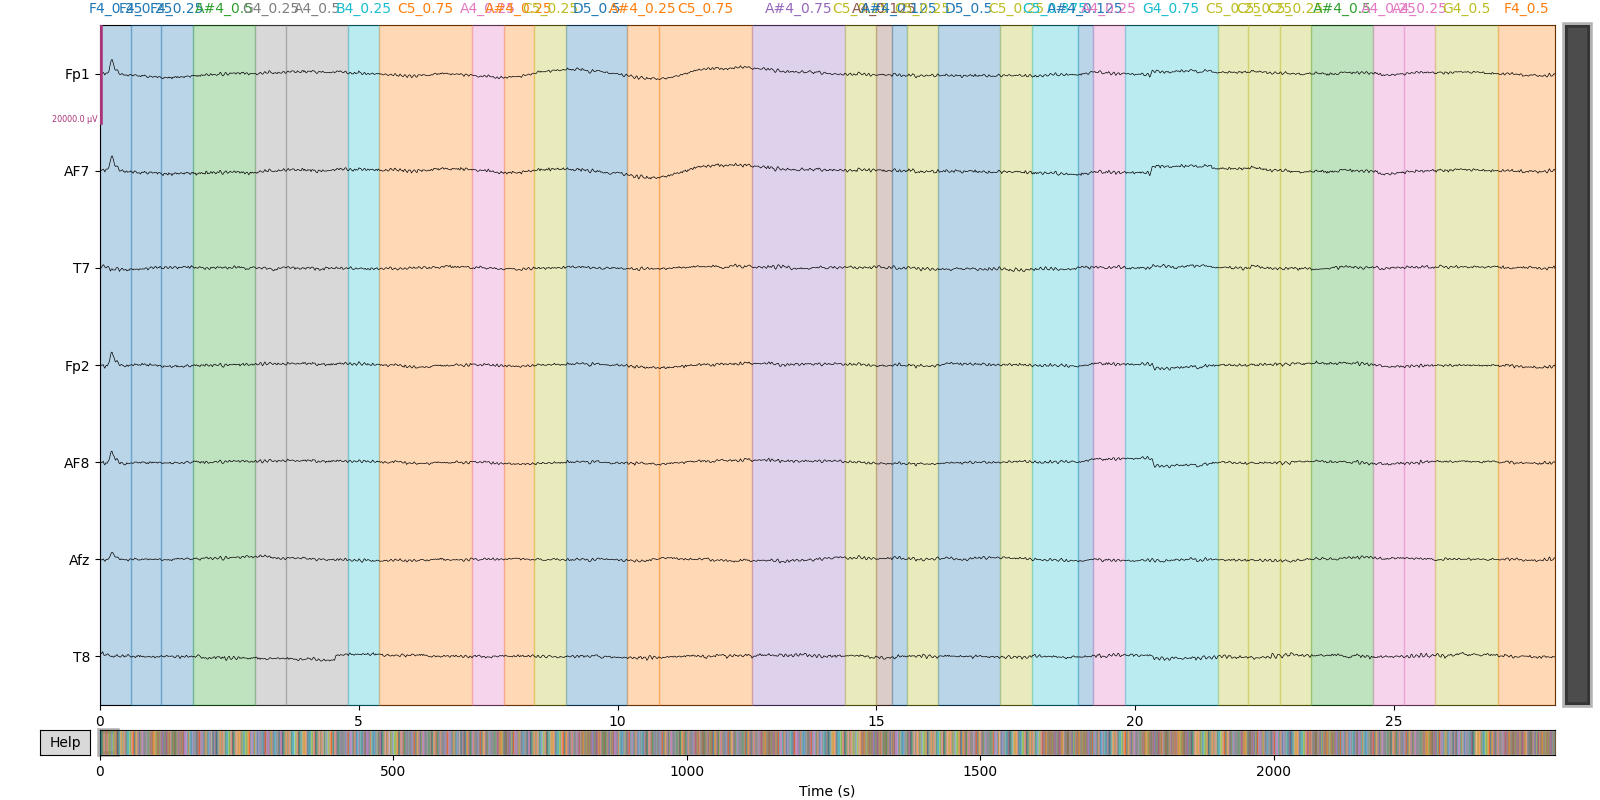

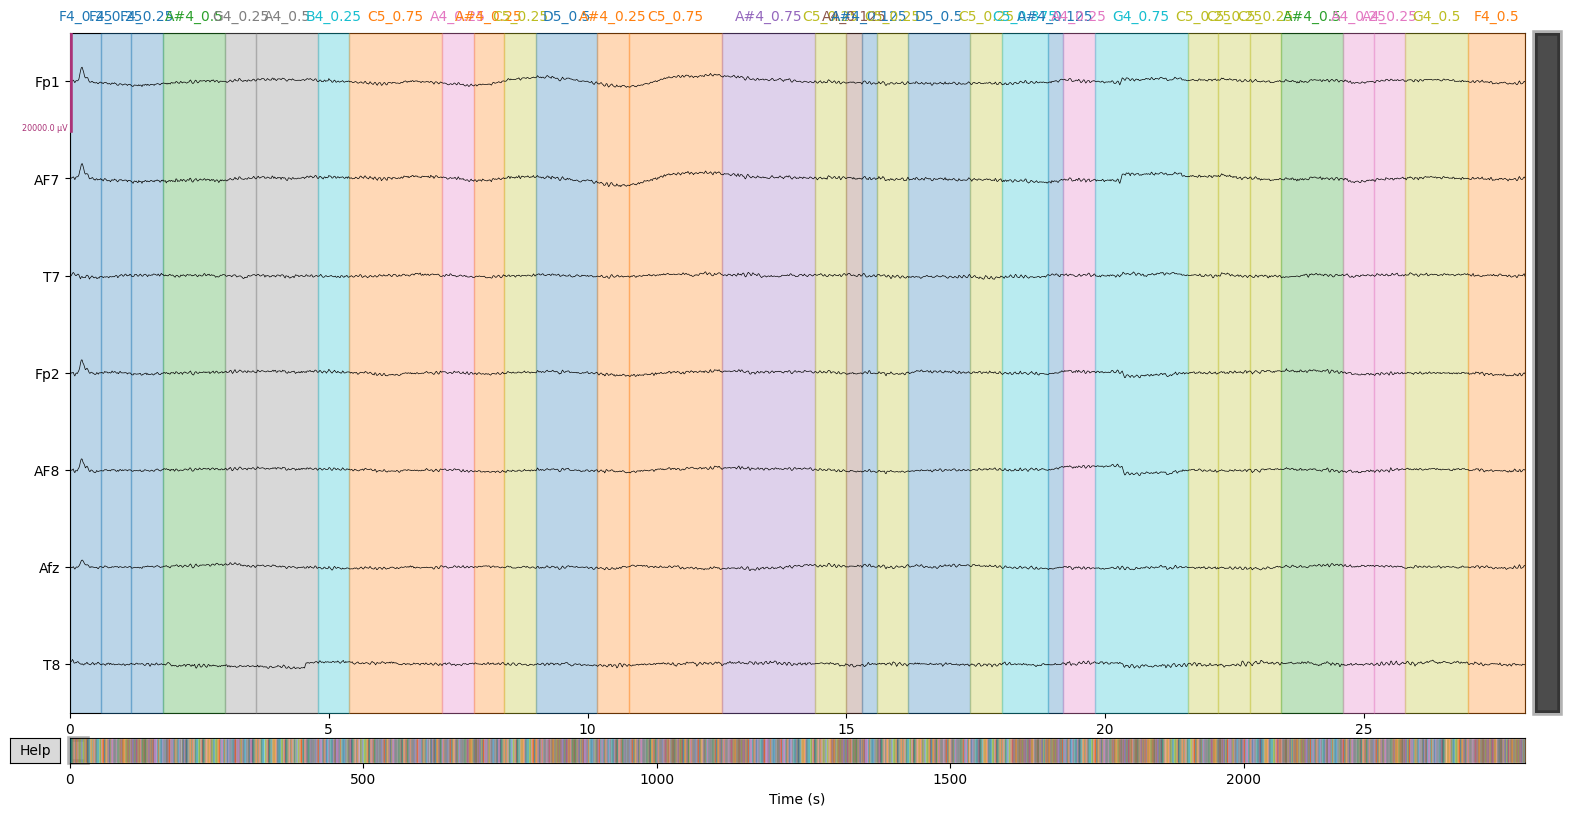

In [13]:
%matplotlib widget 
scalings = {'eeg': 10e-3}

merged_raws.plot(
    scalings = scalings,
    n_channels = 64,
    start = 0, 
    duration = 28.125, #2.4*6,
    picks = ['Fp1', 'Fp2', 'AF7', 'AF8', 'Afz', 'T7', 'T8']
)

In [14]:
note_annot = merged_raws.annotations

In [15]:
boundary_annot = note_annot[note_annot.description == 'BAD boundary']
boundary_annot

<Annotations | 87 segments: BAD boundary (87)>

In [16]:
blink_summary = {}

if not SUBJECT in blink_summary.keys():
    blink_summary[SUBJECT] = mat73.loadmat(BLINK_SUMMARY_PATH)

blinks = blink_summary[SUBJECT]['blinks']
status = blinks['status']
print(f'{SUBJECT}: {status}')

usedSignal = blinks['usedSignal']
print(usedSignal)

if type(blinks['signalData']) == list:
    n_signals = len(blinks['signalData'])
    print(f'# signals = {n_signals}')
    usedSignalIdx = np.where([x['signalNumber'] for x in blinks['signalData']] == blinks['usedSignal'])[0][0]
    signal = blinks['signalData'][usedSignalIdx]['signal']
else:
    signal = blinks['signalData']['signal']

blinkFits = blink_summary[SUBJECT]['blinkFits']
maxFrame = [int(x)-1 for x in blinkFits['maxFrame']] # convert to 0 index

signal = blink_summary[SUBJECT]['blinks']['signalData']['signal']
usedSignal = blink_summary[SUBJECT]['blinks']['usedSignal']
# blinkPositions[:, 2]

2: failure: [Good ratio too low]
-1.0


Setting up band-pass filter from 0.1 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.10, 30.00 Hz: -6.02, -6.02 dB



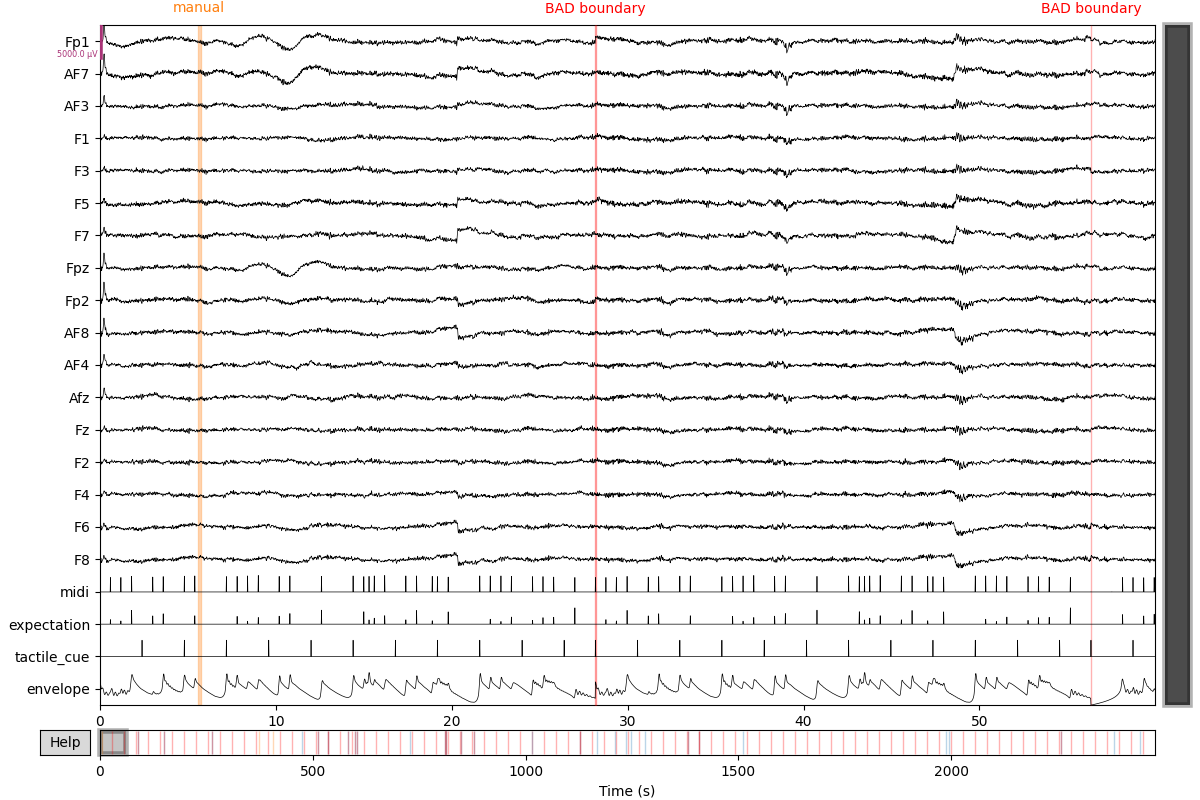

In [17]:
t_manual_blinks = [0, 387, 394] #423, 887, 1014, 1945, 1946, 1973, 2172, 2477]
#t_manual_blinks.extend([0.1, 387, 393, 694, 761, 769, 877.5, 887, 1409, 1725, 1736, 1917, 1918, ])
#t_manual_blinks.extend([])

t_bad_blinker = [90, 150, 264, 511, 536, 583, 598, 603, 812, 849, 878.5, 1128, 1381, 1407, 2259]

t_bad_saccades = None #[788]

# not in all blinks: 1360
unsure = []

mne.set_config('MNE_BROWSE_RAW_SIZE','12,8') # https://mne.discourse.group/t/can-adjust-raw-plot-figure-size-using-rc-settings-in-v-24/3926/5

# Add blink annotations (note annots will be added back later)
plot_annot(
    merged_raws, 
    boundary_annot, 
    blink_summary, 
    SUBJECT,
    None,
    t_manual_blinks,
    t_bad_blinker,
    t_bad_saccades,
    butterfly = False,
    highpass = .1,
    lowpass = 30,
)